# Проект: Определение перспективного тарифа для телеком компании

### Описание проекта  
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Надо провести предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов  
`Тариф «Смарт»`  
- Ежемесячная плата: 550 рублей  
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
 **Стоимость услуг сверх тарифного пакета:**
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей  

`Тариф «Ультра»`
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
 **Стоимость услуг сверх тарифного пакета:**  
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

### Описание данных  
`Таблица users (информация о пользователях):`  
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана  

`Таблица calls (информация о звонках):`
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок  

`Таблица messages (информация о сообщениях):`
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение 

`Таблица internet (информация об интернет-сессиях):`
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

`Таблица tariffs (информация о тарифах):`
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, тосо 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### План проекта:

#### Предобработка данных
- Открываем таблицы и подключаем библиотеки
- Исследуем пропуски
- Приводим данные к нужным типам
- Удаляем дубликаты
- Находим и устраняем ошибки в данных

#### Анализ данных
- Исследуем данные с помощью функции describe()
- Пишем функцию для построения графиков
- Пишем функцию для автоматизации выводов, отвечающую на вопросы: Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
- Применяем эти функции последовательно на столбцы с минутами, смс, интернетом и общей ссумой затрат.
- После каждого применения делаем выводы.

#### Проверяем полученные гипотизы  
- Формулируем нулевую и альтернативную гипотизы
- Выбираем и применяем нужный способ проверки

#### Делаем общий вывод

## Предобработка данных
- Открываем таблицы и подключаем библиотеки
- Исследуем пропуски
- Приводим данные к нужным типам
- Удаляем дубликаты
- Находим и устраняем ошибки в данных

#### Открываем таблицы и подключаем библиотеки

In [1]:
import pandas as pd
from scipy import stats as st
# Импорт библиотеки высокоуровневых математических функций
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
calls = pd.read_csv(/*<ссылка на фаил с данными по звонкам>*/)
internet = pd.read_csv(/*<ссылка на фаил с данными по интернету>*/, index_col=0 )
messages = pd.read_csv(/*<ссылка на фаил с данными по сообщениям>*/)
tariffs = pd.read_csv(/*<ссылка на фаил с данными по тарифам>*/)
users = pd.read_csv(/*<ссылка на фаил с данными по пользователям>*/)

In [3]:
# обновляем пандас, чтобы у всех кто будет запускать эту тетрадку, все работало также как у меня)
!pip install pandas --upgrade

In [4]:
# открываем таблицы
dfki = [calls, internet, messages, tariffs, users]
def dfs():
    
    for data in dfki:
        display(data)
dfs()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Все успешно импортировалось)

#### Ищем пропуски  

In [5]:
dfki_i = ['calls', 'internet', 'messages', 'tariffs', 'users']
counter = 0
for data in dfki:
    print(dfki_i[counter])
    counter += 1
    print(data.isnull().sum() / len(data) * 100)
    print()

calls
id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64

internet
id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64

messages
id              0.0
message_date    0.0
user_id         0.0
dtype: float64

tariffs
messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
rub_monthly_fee          0.0
rub_per_gb               0.0
rub_per_message          0.0
rub_per_minute           0.0
tariff_name              0.0
dtype: float64

users
user_id        0.0
age            0.0
churn_date    92.4
city           0.0
first_name     0.0
last_name      0.0
reg_date       0.0
tariff         0.0
dtype: float64



Отсутвует только дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

#### Ищем явные дубликаты

In [6]:
dfki = [calls, internet, messages, tariffs]
for data in dfki:
    print(data.duplicated().value_counts())

False    202607
dtype: int64
False    149396
dtype: int64
False    123036
dtype: int64
False    2
dtype: int64


явных дубликатов нет

#### Приводим данные к нужным типам  

In [7]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Приведем дату к порядку

In [9]:
# тут только надо дату привести к порядку
def date(data, column):
    data[column] = pd.to_datetime(data[column], format='%Y-%m-%d')
    data.info()
date(calls, 'call_date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [10]:
internet.iloc[1]

id                  1000_1
mb_used            1052.81
session_date    2018-09-07
user_id               1000
Name: 1, dtype: object

In [11]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [12]:
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [13]:
# аналогично приводим к порядку дату и трафик приведем к целочисленному формаму. 
date(internet, 'session_date')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


In [14]:
messages.iloc[1]

id                  1000_1
message_date    2018-10-08
user_id               1000
Name: 1, dtype: object

In [15]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [16]:
# все хорошо, только дата выделяется
date(messages, 'message_date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [17]:
tariffs.iloc[:10]

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [18]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Переведем мб в гб

In [19]:
tariffs['gb_per_month_included'] = (tariffs['mb_per_month_included'] / 1024).astype('int')
tariffs['gb_per_month_included']


0    15
1    30
Name: gb_per_month_included, dtype: int32

In [20]:
users.iloc[:10]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


А вот с пользователями придется поработать)
- привести к форматы даты `churn_date`, `reg_date`
- большую часть столбцов имеет смысл привести к категорийному формату, чтобы занимали меньше места, но я пока не буду. Случаются траблы с таким форматом

In [22]:
date(users, 'churn_date')
date(users, 'reg_date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    object        
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3

#### Выводы:  
- Все столбцы приведены к нужному формату
- Дубликатов и пропусков нет

#### Ищем ошибки в данных
В первую очередь нас волнуют те столбцы по которым мы будем проводить исследование. Это город `city`, объем интернет трафика `mb_used`, длительность звонков `duration`. 


Начнем с города

In [23]:
users['city'].describe()

count        500
unique        76
top       Москва
freq          99
Name: city, dtype: object

In [24]:
users.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by = 'user_id',ascending = False)

,user_id
city,
Москва,99
Санкт-Петербург,39
Новосибирск,16
Казань,14
Омск,14
...,...
Подольск,1
Химки,1
Иваново,1


500 пользователей, 76 городов. Больше всего пользователей в Москве, в 2 раза меньше в Питере. Основная часть пользователей в городах коллеблится от 14 до 1 пользователя. Вроде бы все в порядке, нормальная выборка.
Едем дальше, на очереди интренет трафик

In [25]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

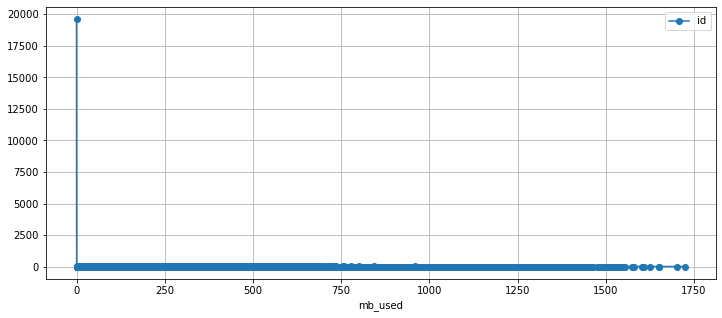

In [26]:
# в будущем она нам еще навреняка пригодится, поэтому построим функцию
def countgraf(column1, column2, df):
    (df
     .pivot_table(index=column1, values=column2, aggfunc='count')
     .plot(grid=True, figsize=(12, 5), style='o-', label='count')
    )
countgraf('mb_used', 'id', internet)

Почти 20 тысяч юзеров с нулевым трафиком по интрернету. Надо их дропнуть, а потом построить график без них

In [27]:
internet = internet.query('0 != mb_used')

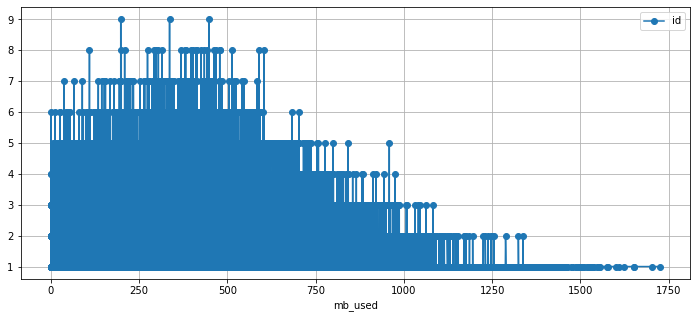

In [28]:
countgraf('mb_used', 'id', internet)

Получилось красивенькое такое распределение Пирсона. Едем дальше, на очереди длительность звонков.

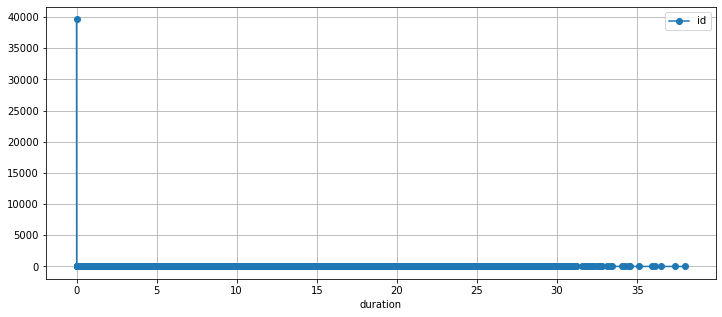

In [29]:
countgraf('duration', 'id', calls)

Почти 40 тысяч нулевых.
Но все же эти нули - не показатели за месяц. Звонок или интернет-сессия была зафиксирована, но по ее итогам стоит 0 в длительности звонка или трафика. Возможно так засчитываются входящие вызовы или что то иное, надо будет уточнить у колег.

In [30]:
calls = calls.query('0 != duration')

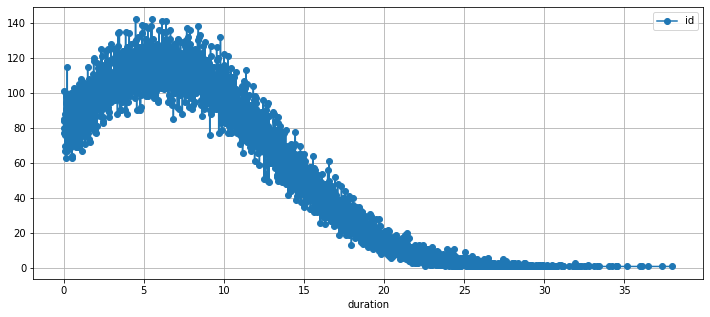

In [31]:
countgraf('duration', 'id', calls)

#### Вывод  
- Нормальное распределение Пирсона. Больше выбивающихся значений нет.
- Удалив нулевые значения мы выбросили целых два сигмента людей: которые не пользуются мобильным интренетом, и тех которые не пользуются звонками, возможно какой то третий сегмент, если интернет сессия или мобильная связь все таки была, но зафиксированна как нулевое значение. 

Сдалаем столбцы с месяцами для `calls` `internet` и `messages`

In [32]:
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month
calls['month']

2          6
3          9
4         12
7          8
8          9
          ..
202602    12
202603    10
202604    11
202605    10
202606    12
Name: month, Length: 162994, dtype: int64

Так как мегалайн окургляет звонки в до целой минуты в большую сторону, мы тоже их так округлим.

In [33]:
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['duration']

2          3
3         14
4          6
7         19
8         19
          ..
202602     1
202603    19
202604    11
202605     5
202606    20
Name: duration, Length: 162994, dtype: int32

Также округлим мегобайты до гигабайт и сохраним их в отдельный столбец

In [34]:
internet['gb_used'] = (internet['mb_used'] / 1024)
internet['gb_used']

0         0.110303
1         1.028135
2         1.169199
3         0.537373
4         0.295469
            ...   
149390    0.735078
149391    0.311426
149392    0.478643
149394    1.217109
149395    0.531611
Name: gb_used, Length: 129798, dtype: float64

Теперь можно сделать ежемесячные суммы по звонкам, интернету и сообщениям для каждого пользователя. Сначала формируем сводные таблицы сгруппированные по пользователям и месяцам, а после объединяем их в одну

In [35]:
calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
calls_pivot

count      sum
              duration duration
user_id month                  
1000    5           17      159
        6           28      172
        7           41      340
        8           42      408
        9           46      466
...                ...      ...
1498    10          30      247
1499    9            8       70
        10          44      449
        11          62      612
        12          56      492

[3168 rows x 2 columns]

Вот такие сводные таблицы получаются, теперь повторим процедуру для интернет трафика и смс, а после чего объединим их

In [36]:
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='gb_used', aggfunc=['count', 'sum'])
# в сообщениях нам нужно только количество
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc=['count'])
# с тарифом будет по сложнее, поэтому мы сначала назначим в нем колонку user_id как индекс и возьмем тариф как интересующий
# нас столбец
tariff_pivot = users.set_index('user_id')['tariff']
# переименуем столбцы
calls_pivot.columns = ['calls_count', 'minutes_used']
internet_pivot.columns = ['sessions_count', 'gb_used']
messages_pivot.columns = ['messages_count']
# склееваем таблицы по индексам, используем параметр how='outer', чтобы включить в таблицу все данные и не потерять пользователей
df_users = calls_pivot.merge(internet_pivot, how='outer', left_index = True, right_index = True)
df_users = df_users.merge(messages_pivot, how='outer', left_index = True, right_index = True)
df_users = df_users.merge(tariff_pivot, how='outer', left_index = True, right_index = True)
df_users

calls_count  minutes_used  sessions_count    gb_used  \
user_id month                                                         
1000    5             17.0         159.0             4.0   2.200674   
        6             28.0         172.0            44.0  22.689229   
        7             41.0         340.0            28.0  13.675430   
        8             42.0         408.0            27.0  13.726494   
        9             46.0         466.0            25.0  14.227451   
...                    ...           ...             ...        ...   
1498    10            30.0         247.0            49.0  20.097031   
1499    9              8.0          70.0             4.0   1.802490   
        10            44.0         449.0            43.0  17.371592   
        11            62.0         612.0            39.0  17.542295   
        12            56.0         492.0            40.0  12.749590   

               messages_count tariff  
user_id month                         
1000    5                22.0  ultra  
        6                60.0  ultra  
        7                75.0  ultra  
        8                81.0  ultra  
        9                57.0  ultra  
...                       ...    ...  
1498    10               42.0  smart  
1499    9                11.0  smart  
        10               48.0  smart  
        11               59.0  smart  
        12               66.0  smart  

[3214 rows x 6 columns]

проверим на пропуски, которые могли образоваться из-за слияния таблиц. Для этого напишим функцию:

In [37]:
def nan_chek(df):
    print(df.isnull().sum() / len(df_users) * 100)
nan_chek(df_users)

calls_count        1.431238
minutes_used       1.431238
sessions_count     0.404480
gb_used            0.404480
messages_count    15.463597
tariff             0.000000
dtype: float64


В большинстве столбцоы образовалось незначительное количетство пропусков, но мы можем наблюдать, что целых пятнадцать процентов месяцев отдельные пользователи не пользовались сообщениями. Подобные пропуски стоит заменить на нулевые значения, т.к. они образовались, потому что данные по отдельным пользователям не нашлось в отдельных таблицах, по причине неиспользования того или иного типа трафика.

In [38]:
# функция заменяет пропущенные значения в столбце на ноль
def past_null(data, column):
    flag = (data[column].isna())
    data.loc[flag, column] = 0
past_null(df_users, 'calls_count')
past_null(df_users, 'minutes_used')
past_null(df_users, 'sessions_count')
past_null(df_users, 'gb_used')
past_null(df_users, 'messages_count')

После этого делаем снова проверку на пропуски

In [39]:
nan_chek(df_users)

calls_count       0.0
minutes_used      0.0
sessions_count    0.0
gb_used           0.0
messages_count    0.0
tariff            0.0
dtype: float64


#### Считаем помесячную выручку для каждого пользователя  
Для этого нам понадобится:  
- Вычислить минуты, смс и гб израсходаванные сверх тарифа
- умножить их на тарифную ставку и сложить с ценой тарифного плана

In [40]:
df_users

calls_count  minutes_used  sessions_count    gb_used  \
user_id month                                                         
1000    5             17.0         159.0             4.0   2.200674   
        6             28.0         172.0            44.0  22.689229   
        7             41.0         340.0            28.0  13.675430   
        8             42.0         408.0            27.0  13.726494   
        9             46.0         466.0            25.0  14.227451   
...                    ...           ...             ...        ...   
1498    10            30.0         247.0            49.0  20.097031   
1499    9              8.0          70.0             4.0   1.802490   
        10            44.0         449.0            43.0  17.371592   
        11            62.0         612.0            39.0  17.542295   
        12            56.0         492.0            40.0  12.749590   

               messages_count tariff  
user_id month                         
1000    5                22.0  ultra  
        6                60.0  ultra  
        7                75.0  ultra  
        8                81.0  ultra  
        9                57.0  ultra  
...                       ...    ...  
1498    10               42.0  smart  
1499    9                11.0  smart  
        10               48.0  smart  
        11               59.0  smart  
        12               66.0  smart  

[3214 rows x 6 columns]

Теперь из значений таблицы df_users вычислим затраты на каждый месяц

In [41]:
def price(row):
    user = (df_users.iloc[0].name[0])
    min = 0
    gb = 0
    sms = 0
    if row['tariff'] == 'smart':
        # высчитываем количество минут сверхтарифа
        if row['minutes_used'] > tariffs['minutes_included'][0]:
            min = row['minutes_used'] - tariffs['minutes_included'][0]
        # высчитываем количество потраченых гб сверх лимита
        if row['gb_used'] > tariffs['gb_per_month_included'][0]:
            gb = row['gb_used'] - tariffs['gb_per_month_included'][0]
        # высчитываем количество смс сверхлимита
        if row['messages_count'] > tariffs['messages_included'][0]:
            sms = row['messages_count'] - tariffs['messages_included'][0]
        
        #высчитываем выручку по пользователям за каждый месяц
        return (min * tariffs['rub_per_minute'][0] +
                gb * tariffs['rub_per_gb'][0] + 
                sms * tariffs['rub_per_message'][0] +
                tariffs['rub_monthly_fee'][0])
    if row['tariff'] == 'ultra':
        # высчитываем количество минут сверхтарифа
        if row['minutes_used'] > tariffs['minutes_included'][1]:
            min = row['minutes_used'] - tariffs['minutes_included'][1]
        # высчитываем количество потраченых гб сверх лимита
        if row['gb_used'] > tariffs['gb_per_month_included'][1]:
            gb = row['gb_used'] - tariffs['gb_per_month_included'][1]
        # высчитываем количество смс сверхлимита
        if row['messages_count'] > tariffs['messages_included'][1]:
            sms = row['messages_count'] - tariffs['messages_included'][1]
        
        #высчитываем выручку по пользователям за каждый месяц
        return (min * tariffs['rub_per_minute'][1] +
                gb * tariffs['rub_per_gb'][1] + 
                sms * tariffs['rub_per_message'][1] +
                tariffs['rub_monthly_fee'][1])
df_users['profit'] = df_users.apply(price, axis=1)
df_users['profit']

user_id  month
1000     5        1950.000000
         6        1950.000000
         7        1950.000000
         8        1950.000000
         9        1950.000000
                     ...     
1498     10       1569.406250
1499     9         550.000000
         10       1024.318359
         11       1421.458984
         12        598.000000
Name: profit, Length: 3214, dtype: float64

Выполняем короткую проверку, что данные по всем пользователям попали в обработку, чтобы исключить возможную смену тарифа у пользователей.

In [42]:
nan_chek(df_users)

calls_count       0.0
minutes_used      0.0
sessions_count    0.0
gb_used           0.0
messages_count    0.0
tariff            0.0
profit            0.0
dtype: float64


#### Выводы  
- Мы успешно подготовили данные к дальнейшему анализу!
- Данные изначально уже имели достаточно благостный вид и мы только свели все в удобную сводную табличку по пользователям и высчитали помесячную выручку с каждого пользователя.

In [43]:
df_users.sort_values(by='profit')

calls_count  minutes_used  sessions_count    gb_used  \
user_id month                                                         
1421    4             38.0         379.0            44.0  14.890352   
        12            36.0         335.0            44.0  14.257354   
1169    6              7.0          72.0            12.0   4.338027   
        12            30.0         281.0            33.0  10.687559   
1171    3             19.0         158.0            14.0   5.818066   
...                    ...           ...             ...        ...   
1286    12            83.0         739.0            92.0  34.285225   
1486    11            84.0         764.0            98.0  35.416123   
1042    12            94.0         728.0            98.0  36.294619   
1261    12           113.0        1074.0            94.0  31.885654   
1486    12           115.0        1007.0           101.0  37.648877   

               messages_count tariff       profit  
user_id month                                      
1421    4                44.0  smart   550.000000  
        12               36.0  smart   550.000000  
1169    6                 2.0  smart   550.000000  
        12               13.0  smart   550.000000  
1171    3                23.0  smart   550.000000  
...                       ...    ...          ...  
1286    12               68.0  smart  5178.044922  
1486    11               96.0  smart  5563.224609  
1042    12               75.0  smart  5567.923828  
1261    12               22.0  smart  5649.130859  
1486    12               83.0  smart  6699.775391  

[3214 rows x 7 columns]

### Анализ данных
Опишим поведение клиентов оператора, исходя из выборки и ответим на вопрос: Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?  
Для этого: 
- Посчитаем среднее их количество, дисперсию и стандартное отклонение. 
- Построим гистограммы и опишем распределения.

### Предобработка данных
- Открываем таблицы и подключаем библиотеки
- Исследуем пропуски
- Приводим данные к нужным типам
- Удаляем дубликаты
- Находим и устраняем ошибки в данных

Чтобы посчитать среднее, дисперсию и стандардное отклонение воспользуемся прекрасной функцией `describe`

In [44]:
ultra_describe = df_users.query('tariff == "ultra"').describe()
smart_describe = df_users.query('tariff == "smart"').describe()
display(ultra_describe)
smart_describe

,calls_count,minutes_used,sessions_count,gb_used,messages_count,profit
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,59.236548,526.623350,36.631472,19.012505,49.363452,2059.868918
std,35.562722,317.606098,18.778156,9.850753,47.804457,354.880790
min,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,33.000000,284.000000,22.000000,11.494395,6.000000,1950.000000
50%,58.000000,518.000000,36.000000,18.855479,38.000000,1950.000000
75%,84.000000,752.000000,49.000000,26.208682,79.000000,1950.000000
max,190.000000,1673.000000,94.000000,48.579775,224.000000,4736.966309


,calls_count,minutes_used,sessions_count,gb_used,messages_count,profit
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,46.947510,417.934948,42.043966,15.828503,33.384029,1230.442346
std,21.039171,190.313730,14.807528,5.732887,28.227876,785.720816
min,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,32.000000,282.000000,34.000000,12.346689,10.000000,550.000000
50%,47.000000,422.000000,43.000000,16.119961,28.000000,957.978516
75%,61.000000,545.000000,51.000000,19.573174,51.000000,1665.488281
max,162.000000,1435.000000,101.000000,37.648877,143.000000,6699.775391


Очень информативно, но совершенно не наглядно. Поэтому будем строить графики по каждому столбцу отдельно

In [55]:
#напишем функцию для автоматизации части выводов
def analiz(df, column):
    mean_u = df[df['tariff']=='ultra'][column].mean()
    mean_s = df[df['tariff']=='smart'][column].mean()
    variance_u = np.var(df[df['tariff']=='ultra'][column])
    variance_s = np.var(df[df['tariff']=='smart'][column])
    st_dev_u = np.std(df[df['tariff']=='ultra'][column])
    st_dev_s = np.std(df[df['tariff']=='smart'][column])
    return pd.DataFrame(data={
        'ultra':[mean_u, variance_u, st_dev_u],
        'smart':[mean_s, variance_s, st_dev_s]},
                      index=['Средние траты в на пользователя месяц', 'Дисперсия','Стандартное отклонение'])


In [53]:
# эта функция увеличит размер всех графиков
plt.rcParams['figure.figsize'] = (15,10)

def vio(df,x,y):
    sns.violinplot(y=y, 
                   x=x,
                   data=df, 
                   split=True, 
                   inner="box", 
                   linewidth=1,
                   palette="Set2",
                   scale="count",
                  )
    plt.grid()

**Посмотрим на поведение клиентов оператора относительно использования минут звонков**

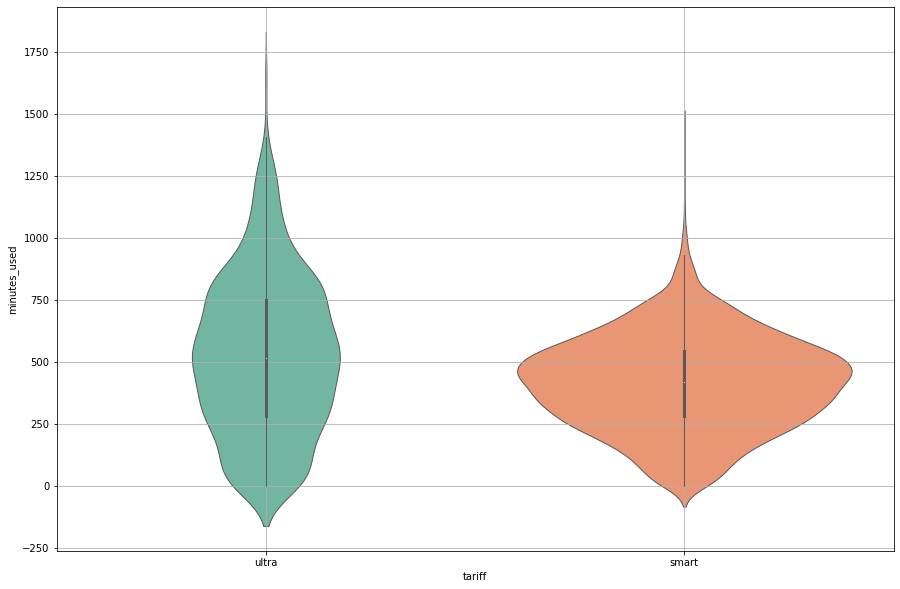

In [47]:
vio(df_users, 'tariff', 'minutes_used')

In [56]:
analiz(df_users, 'minutes_used')

,ultra,smart
Средние траты в на пользователя месяц,526.623350,417.934948
Дисперсия,100771.223617,36203.066652
Стандартное отклонение,317.444836,190.271035


- Примерно 30% месяцев пользователям тарифа smart не хватило выделенных тарифом 500 минут.
- Рекорд использованных минут в месяц принадлежит пользователю тарифа ultra и составляет 1673 минут
- Больше 25% месяцев пользователи тарифа ultra ежемесячно использовали более 750 минут
- В абсолютном большинстве месяцев пользователи тарифа smart не использовали больше 1000 минут в месяц

**Посмотрим на количество сообщений**

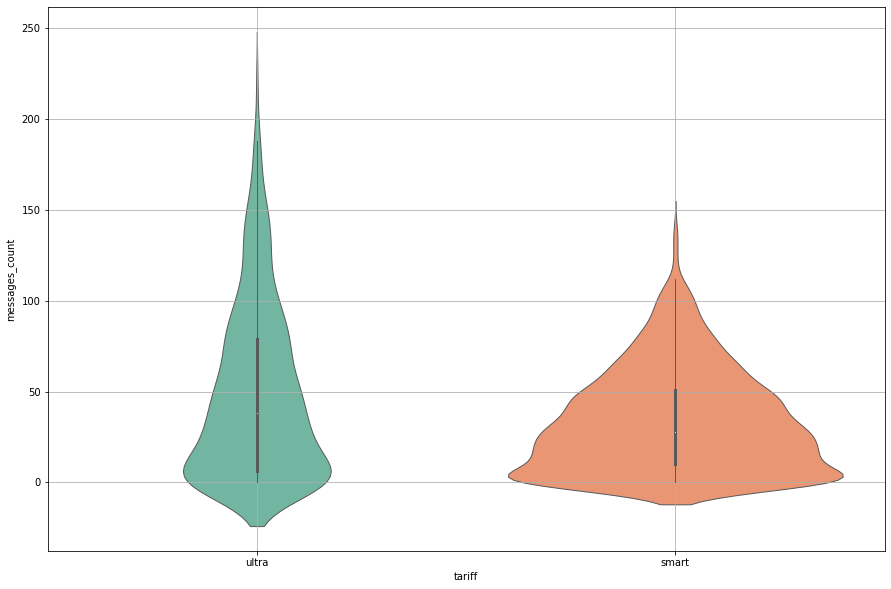

In [49]:
vio(df_users, 'tariff', 'messages_count')

In [57]:
analiz(df_users, 'messages_count')

,ultra,smart
Средние траты в на пользователя месяц,49.363452,33.384029
Дисперсия,2282.946075,796.455483
Стандартное отклонение,47.780185,28.221543


- В среднем 25% процентов месяцев пользователи тарифа `smart` выходили за предел лимита в 50 смс
- никто из пользователей тарифа ultra не истратил и четверти лимита смс
- пользователи имеют тенденцию не пользоваться смс

**Интернет трафик:**

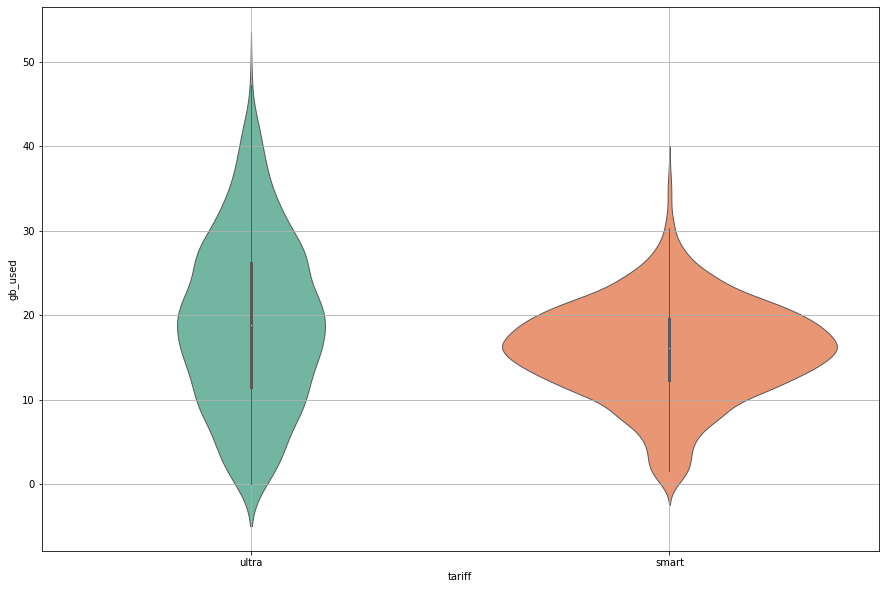

In [51]:
vio(df_users, 'tariff', 'gb_used')

In [58]:
analiz(df_users, 'gb_used')

,ultra,smart
Средние траты в на пользователя месяц,19.012505,15.828503
Дисперсия,96.938813,32.851253
Стандартное отклонение,9.845751,5.731601


- Пользователи тарифа `ultra` в среднем используют больше различного трафика, чем пользователи тарифа `smart`
- Пользователям тарифа `smart` в среднем не хватает 15 гб в месяц
- Распределения похожи на нормальные
- Стандартные отклонения по разным видам трафика между тарифами сильно отличаются

In [53]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


Проанализируем выручку по пользователям

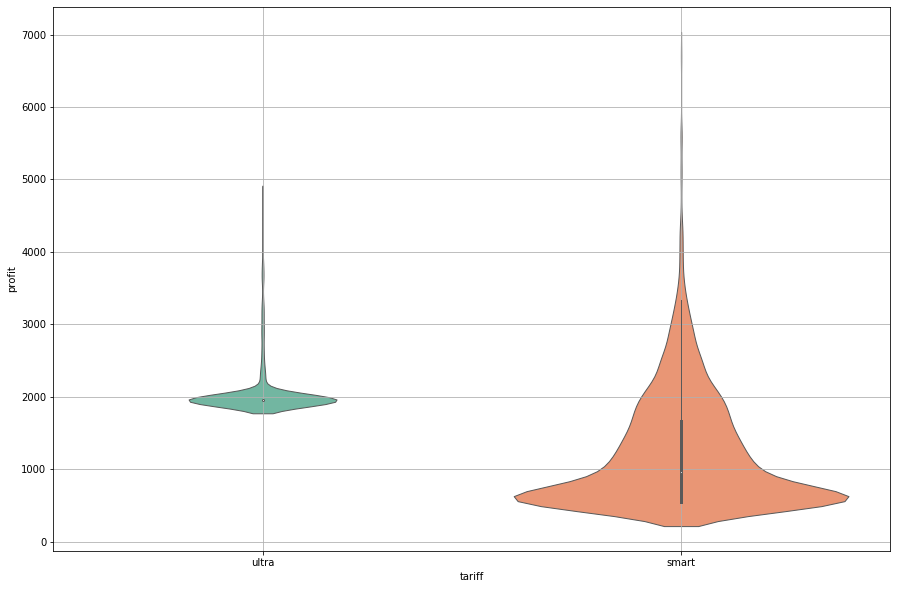

In [54]:
vio(df_users, 'tariff', 'profit')

In [59]:
analiz(df_users, 'profit')

,ultra,smart
Средние траты в на пользователя месяц,2059.868918,1230.442346
Дисперсия,125812.516562,617080.234505
Стандартное отклонение,354.700601,785.544546


- Абсолютное большинство пользователей тарифа `ultra` не переплачивает свою базисную тарифную ставку в 1950 рублей
- Пользователи тарифа `smart`в абсолютном большинстве случаев платят меньше пользователей тарифа `ultra`
- Несмотря на то, что медиана смещена на расход 1000 в месяц, значительное количество (примерно 25 %) пользователей тарифа `smart` укладываются в заданные лимиты
- Дисперсия и стандартное отклонение тарифов сильно отличаются, что будет для нас важно при проверке гипотез

### Проверка гипотез  
  
Будем проверять наши выводы для генеральной совокупности. Успешен ли также тариф `smart` в генеральной совокупности, также как он успешен в нашей подборке? Давайте проверим) Для этого мы выдвинем нулевую гипотезу, которая будет утверждать о равности средней выручки генеральных совокупностей, а в случае ее провала, будем считать нашу гипотезу большей успешности тарифа `smart` рабочей

Сформулируем нулевую и альтернативную гипотизы:
- Н0: Средняя выручка генеральной совокупности пользователей тарифа `smart`, равна средняя выручки генеральной совокупности пользователей тарифа `ultra`
- Н1: Средняя выручка генеральной совокупности пользователей тарифа `smart`, не равна средней выручки генеральной совокупности пользователей тарифа `ultra`

In [56]:
sample_1 = df_users[df_users['tariff']=='ultra']['profit']
sample_2 = df_users[df_users['tariff']=='smart']['profit']
results = st.ttest_ind(
    sample_1,
    sample_2,
    equal_var = False)
print(f'p-значение: {results.pvalue:.10f}')
alpha = 0.05
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.0000000000
Отвергаем нулевую гипотезу


### Выводы
- Крайне мало вероятно что тарифы приносят однинаковое количество средств, и согластно настоящей выборке можно сделать вывод, что тариф `ultra` действительно более выгоден оператору.

Теперь сравним наши данные по выручке по Москве с другими городами. Для этого добавил столбец с городами в наш датафрейм

In [57]:
city_pivot = users.set_index('user_id')['city']
df_users = df_users.merge(city_pivot, how='outer', left_index = True, right_index = True)
df_users

calls_count  minutes_used  sessions_count    gb_used  \
user_id month                                                         
1000    5             17.0         159.0             4.0   2.200674   
        6             28.0         172.0            44.0  22.689229   
        7             41.0         340.0            28.0  13.675430   
        8             42.0         408.0            27.0  13.726494   
        9             46.0         466.0            25.0  14.227451   
...                    ...           ...             ...        ...   
1498    10            30.0         247.0            49.0  20.097031   
1499    9              8.0          70.0             4.0   1.802490   
        10            44.0         449.0            43.0  17.371592   
        11            62.0         612.0            39.0  17.542295   
        12            56.0         492.0            40.0  12.749590   

               messages_count tariff       profit         city  
user_id month                                                   
1000    5                22.0  ultra  1950.000000    Краснодар  
        6                60.0  ultra  1950.000000    Краснодар  
        7                75.0  ultra  1950.000000    Краснодар  
        8                81.0  ultra  1950.000000    Краснодар  
        9                57.0  ultra  1950.000000    Краснодар  
...                       ...    ...          ...          ...  
1498    10               42.0  smart  1569.406250  Владикавказ  
1499    9                11.0  smart   550.000000        Пермь  
        10               48.0  smart  1024.318359        Пермь  
        11               59.0  smart  1421.458984        Пермь  
        12               66.0  smart   598.000000        Пермь  

[3214 rows x 8 columns]

Красота!) Теперь зададим нулевую гипотизу, что `средняя выручка генеральной совокупности пользователей Москвы, равна средняя выручки генеральной совокупности пользователей других городов`  
А альтернативной будет, что `средняя выручка генеральной совокупности пользователей Москвы, не равна средней выручки генеральной совокупности пользователей других городов`

In [58]:
moscow = df_users[df_users['city'] == 'Москва']['profit']
no_moscow = df_users[df_users['city'] != 'Москва']['profit']
results = st.ttest_ind(
    moscow,
    no_moscow,
    equal_var = False)
print(f'p-значение: {results.pvalue:.10f}')
alpha = 0.05
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.4503618930
Не получилось отвергнуть нулевую гипотезу


- С высокой долью вероятности пользователи расходуют на сотовую связь в Москве примерно столько же средств сколько и в регионах

## Общий вывод:

- Средняя выручка генеральной совокупности тарифа `ultra` очень наверняка значительно больше средней выручки генеральной совокупности тарифа `smart`. Следовательно, тариф `ultra` более выгоден оператору.
- С высокой долью вероятности пользователи расходуют на сотовую связь в Москве примерно столько же средств сколько и в регионах.
- Пользователи тарифа `ultra` в среднем используют больше трафика интернета, минут и смс чем пользователи тарифа `smart`
- Большинству пользователей тарифа не хватает лимита интернета в 15 гб, но при этом лимита в 30 гб хватает абсолютному большинству пользователей
- Смс уходят в прошлое, однако значительное количество пользователей в среднем используют по 30-50 смс в месяц